In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [4]:
df=pd.read_csv(r"C:\Python Skill4Future Session\Solar_ML Model\solar_power_output(in).csv")

In [5]:
df

,temperature,humidity,solar_irradiance,wind_speed,solar_power_output
0,19.363503,75.852937,266.619636,5.190818,128.101772
1,33.767858,62.887709,587.710853,4.791819,290.911789
2,28.299849,44.762209,885.651252,0.256421,442.336390
3,24.966462,85.103602,759.002398,3.412478,380.261988
4,13.900466,74.778494,825.905033,3.801956,415.931953
...,...,...,...,...,...
495,18.833806,27.326566,701.391519,6.569552,352.480220
496,24.591403,93.385086,657.541311,9.566146,326.834297
497,11.943366,30.945490,517.144639,0.689580,259.133251
498,34.359870,96.018988,441.807202,0.570547,223.778240


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         500 non-null    float64
 1   humidity            500 non-null    float64
 2   solar_irradiance    500 non-null    float64
 3   wind_speed          500 non-null    float64
 4   solar_power_output  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [8]:
df.head()

,temperature,humidity,solar_irradiance,wind_speed,solar_power_output
0,19.363503,75.852937,266.619636,5.190818,128.101772
1,33.767858,62.887709,587.710853,4.791819,290.911789
2,28.299849,44.762209,885.651252,0.256421,442.336390
3,24.966462,85.103602,759.002398,3.412478,380.261988
4,13.900466,74.778494,825.905033,3.801956,415.931953


In [9]:
#features and target variable
X=df[['temperature','humidity','solar_irradiance','wind_speed']]
y=df['solar_power_output']

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model=LinearRegression()
model.fit(X_train ,y_train)

LinearRegression()

In [12]:
#predicting the solar power o/p on the test set
y_pred=model.predict(X_test)

In [13]:
y_pred

array([145.57713107,  58.80813609, 162.02529474, 389.82145928,
       499.91950595, 201.02821571, 280.32773309, 343.94995965,
       207.65845172, 274.08855806, 270.4758993 ,  71.45181395,
       429.27171131, 474.93452179, 131.00879231, 488.72382533,
       351.97648481,  66.01156112, 286.53039282, 315.26996556,
       156.25649584, 217.68415496, 328.50926609, 456.09724416,
       224.59964917, 343.33441392, 258.65661936, 253.27035923,
       487.33886963, 488.13938701, 352.87341422, 139.35221978,
       486.24574421, 166.59050111, 443.99714231, 498.93693594,
       440.23818943, 184.21480103, 497.81182989, 239.22808164,
       345.26650268, 281.3410799 , 215.84679473, 472.53738058,
       105.19383875, 353.92961077, 132.62179773, 496.30985098,
       472.03357269, 464.32390433,  68.39576649, 337.05784427,
       271.45779666, 142.00782193, 330.57420012, 209.16463828,
       431.33413853, 460.52547819, 271.68335515, 148.17216827,
       322.32496319, 189.54364633, 148.80585847,  54.32

In [14]:
#Evaluate the model performance
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 29.46234596562632
R-squared: 0.9983255901418433


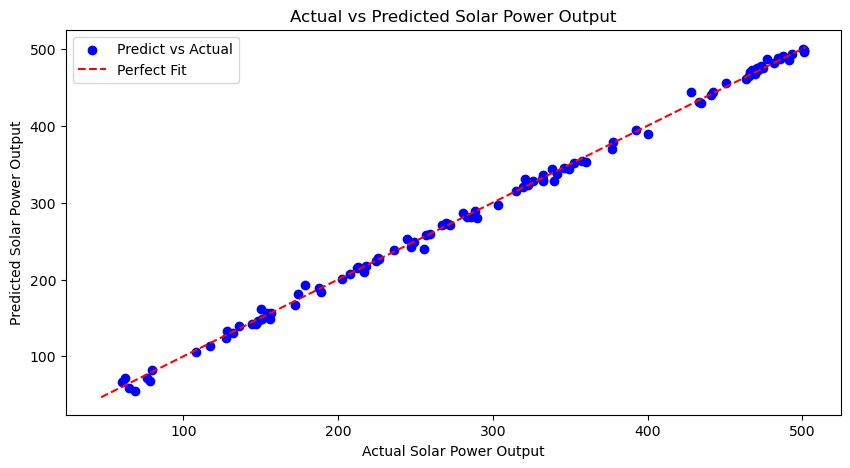

In [15]:
import matplotlib.pyplot as plt

#Scatter plot to compare actual vs predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, color='blue',label='Predict vs Actual')

#diagonal line for perfect predictions
plt.plot([y.min(),y.max()],[y.min(),y.max()],color='red', linestyle='--',label='Perfect Fit')
plt.xlabel("Actual Solar Power Output")
plt.ylabel("Predicted Solar Power Output")
plt.title("Actual vs Predicted Solar Power Output")
plt.legend()
plt.show()

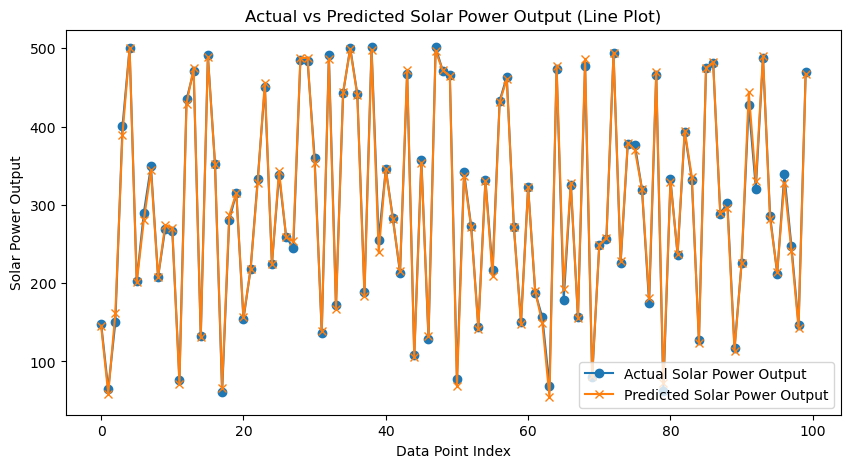

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label="Actual Solar Power Output", marker='o')
plt.plot(range(len(y_pred)), y_pred, label="Predicted Solar Power Output", marker='x')
plt.xlabel("Data Point Index")
plt.ylabel("Solar Power Output")
plt.title("Actual vs Predicted Solar Power Output (Line Plot)")
plt.legend()
plt.show()

In [17]:
#Save the trained model
joblib.dump(model,'solar_power_output(in).pkl')

['solar_power_output(in).pkl']

In [18]:
import joblib
import numpy as np

model = joblib.load('solar_power_output(in).pkl')
new_data = np.array([[19.36, 75.85, 266.61, 5.19]])
predicted_output = model.predict(new_data)
print(f"Predicted Solar Power Output: {predicted_output[0]} watts")


Predicted Solar Power Output: 132.61670573106244 watts


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
